<a href="https://colab.research.google.com/github/rafaellagidaro/DesafioTelecomX/blob/main/TelecomX_AnaliseCompleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extração

In [13]:
import json
import pandas as pd

# Open and load the JSON data from the file
with open('/content/TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Normalizing dados alinhados
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🧹 Verificação e Tratamento de Inconsistências

In [14]:
# Verificando tipos de dados e valores nulos
print(df.info())
print(df.isnull().sum())

# Remover valores inconsistentes na coluna 'Churn'
df = df[df['Churn'].isin(['Yes', 'No'])]

# Convertendo colunas numéricas
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')

# Removendo linhas com valores faltantes relevantes
df.dropna(subset=['account.Charges.Total', 'account.Charges.Monthly'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

<ipython-input-14-2471062940>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
<ipython-input-14-2471062940>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
<ipython-input-14-2471062940>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

# 📆 Criar Coluna de Contas Diárias

In [15]:
# Criar coluna de contas diárias (Monthly * tenure)
df['DailyCharges'] = (df['account.Charges.Total'] / (df['customer.tenure'] * 30)).round(2)
df.head()

<ipython-input-15-976140686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DailyCharges'] = (df['account.Charges.Total'] / (df['customer.tenure'] * 30)).round(2)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,DailyCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


# 🔧 Padronização e Transformação de Dados

In [22]:
# Renomear colunas para facilitar leitura
df.columns = df.columns.str.replace('.', '_')

# Converter a coluna 'Churn' em binária
df['ChurnBinary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 📊 Análise Descritiva

In [17]:
# Estatísticas gerais
df.describe(include='all')

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,DailyCharges,ChurnBinary
count,7032,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032.000000,7032.000000
unique,7032,2,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,2,4,NaN,NaN,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN
freq,1,5163,3549,NaN,3639,4933,NaN,6352,3385,3096,...,3472,2809,2781,3875,4168,2365,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,2.159878,0.265785
std,NaN,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,1.006210,0.441782
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.460000,0.000000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,1.207500,0.000000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,2.350000,0.000000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,3.010000,1.000000


# 📈 Evasão por Variáveis Categóricas

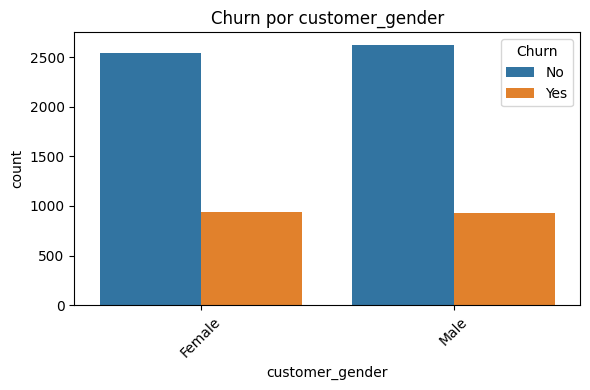

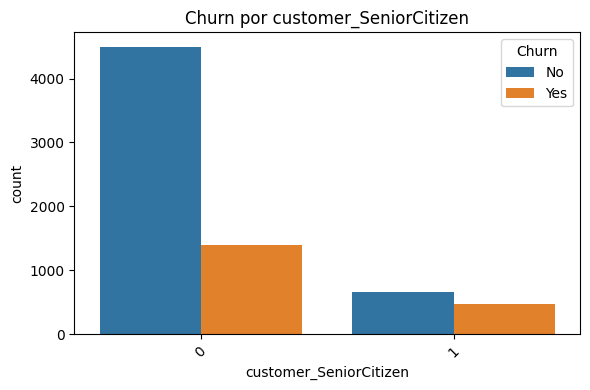

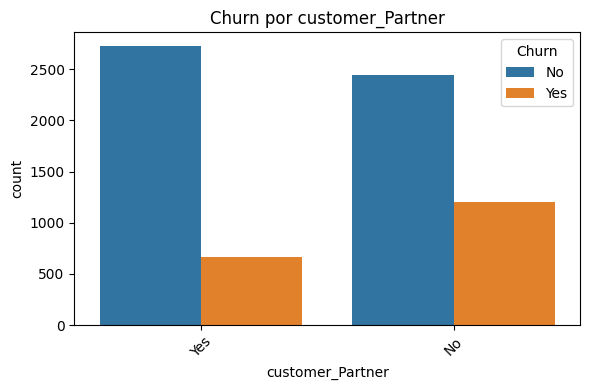

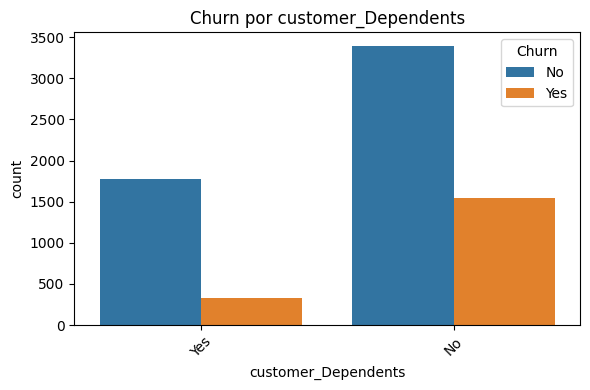

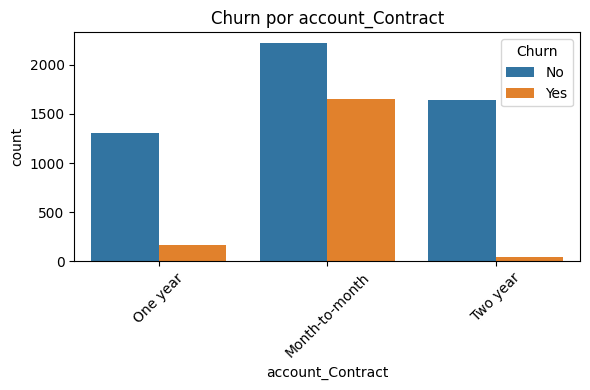

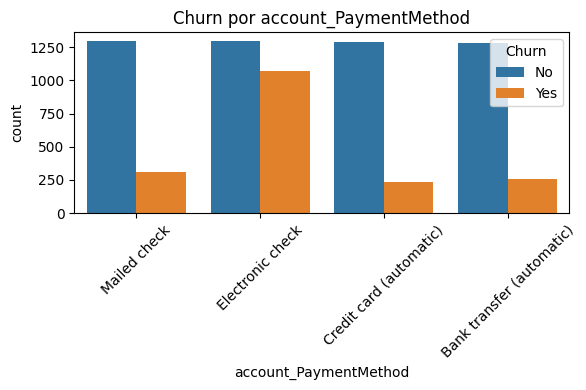

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
                    'customer_Dependents', 'account_Contract', 'account_PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'Churn por {col}')
    plt.tight_layout()
    plt.show()

# 📉 Evasão por Variáveis Numéricas

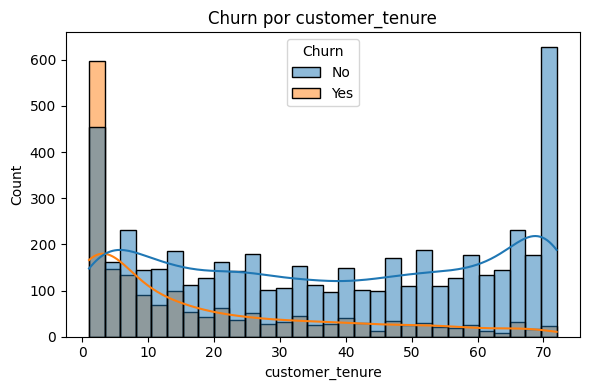

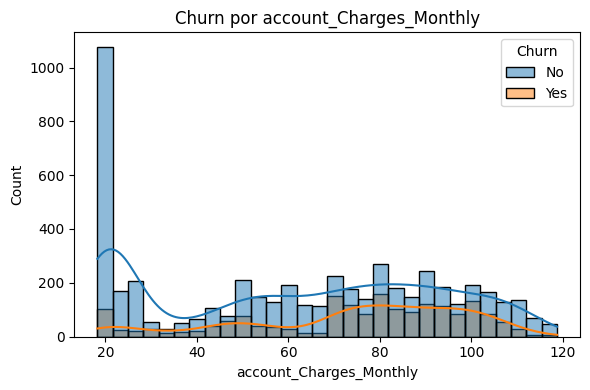

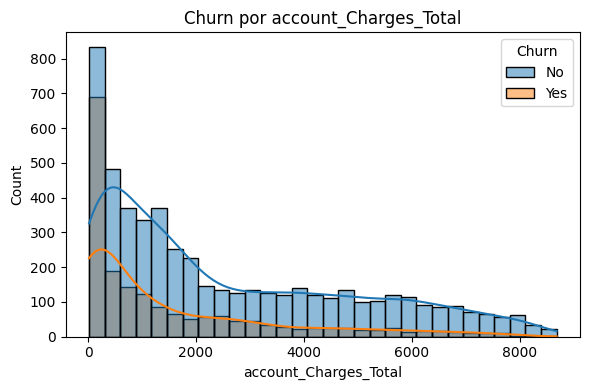

In [19]:
numeric_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', bins=30, kde=True)
    plt.title(f'Churn por {col}')
    plt.tight_layout()
    plt.show()

# 🔗 Análise de Correlação

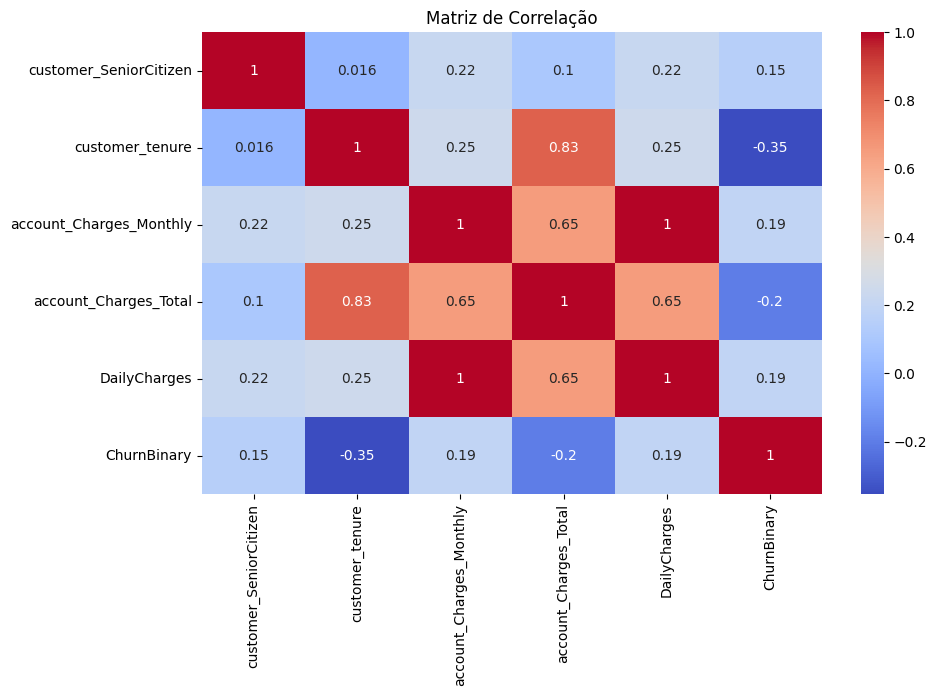

In [20]:
# Correlação entre variáveis numéricas e evasão
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# 📘 README - Análise TelecomX

Este notebook realiza uma análise exploratória e preditiva dos dados de clientes da TelecomX, com foco em entender o comportamento de evasão (churn).

## Etapas:
- Extração e limpeza dos dados
- Cálculo de métricas derivadas
- Análise descritiva e visual
- Investigação da evasão por categorias e números
- Correlação entre variáveis

## Objetivo:
Identificar padrões que ajudam a prever e reduzir a evasão de clientes.



# 🧾 Relatório Final

In [21]:
# Relatório simplificado
evaded = df[df['Churn'] == 'Yes']
retained = df[df['Churn'] == 'No']

print(f"Total clientes: {len(df)}")
print(f"Evasão: {len(evaded)} ({len(evaded)/len(df)*100:.2f}%)")
print(f"Retidos: {len(retained)} ({len(retained)/len(df)*100:.2f}%)")

Total clientes: 7032
Evasão: 1869 (26.58%)
Retidos: 5163 (73.42%)
